# Week 2 Assignment Notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

## Bayesian Decision Theory

Our priors are defiend by a MLE of the Bernoulli distribution for each class of examples, with the parameter P:
\begin{equation}
\hat P = \frac{{\sum {{x^t}} }}{N}
\end{equation}

Our liklihoods are defiend by a MLE of the Normal distribution, with the parameters mean and standard deviation:

\begin{equation}
p(x|\mu ,{\sigma}) = \frac{1}{{\sqrt {2{\sigma ^2}\pi } }}\exp \left[ {\frac{{{{(x - \mu )}^2}}}{{2{\sigma ^2}}}} \right], - \infty  < x < \infty
\end{equation}

We use the univariate normal density function provided in SciPy to calulate values or vectors:

In [2]:
# norm.pdf(INPUT_SAMPLE_OR_VECTOR, loc=MEAN_VALUE, scale=STANDARD_DEVIATION_VALUE)

We use Bayes theorem to find a posterior probability:
\begin{equation}
p({C_1|\mathbf{x}}) = \frac{p({\mathbf{x}}|C_1)\hat P(C_1)}{p({\mathbf{x}}|C_1)\hat P(C_1) + p({\mathbf{x}}|C_2)\hat P(C_2)}
\end{equation}

In [3]:
prior_1 = 0.3
prior_2 = 1 - prior_1
liklihood_1_mean = -1.5
liklihood_1_std = 0.5
liklihood_2_mean = 1
liklihood_2_std = 0.8

x_i = -0.4

# normal density function: loc = mean, scale = standard deviation
print "Posterior 1: ", norm.pdf(x_i, loc=liklihood_1_mean, scale=liklihood_1_std)*prior_1 /  \
    (norm.pdf(x_i, loc=liklihood_1_mean, scale=liklihood_1_std)*prior_1+  \
    norm.pdf(x_i, loc=liklihood_2_mean, scale=liklihood_2_std)*prior_2)
print "Posterior 2: ", norm.pdf(x_i, loc=liklihood_2_mean, scale=liklihood_2_std)*prior_2 /  \
    (norm.pdf(x_i, loc=liklihood_1_mean, scale=liklihood_1_std)*prior_1+  \
    norm.pdf(x_i, loc=liklihood_2_mean, scale=liklihood_2_std)*prior_2)    

Posterior 1:  0.21993516646
Posterior 2:  0.78006483354


In [4]:
# generate a set of uniformly distributed points for plotting
x_min = min([norm.ppf(.00001, loc=liklihood_1_mean, scale=liklihood_1_std),
     norm.ppf(.00001, loc=liklihood_2_mean, scale=liklihood_2_std)])
x_max = max([norm.ppf(0.99999, loc=liklihood_1_mean, scale=liklihood_1_std),
     norm.ppf(0.99999, loc=liklihood_2_mean, scale=liklihood_2_std)])
x = np.linspace(x_min, x_max, 200)

In [5]:
# calculate over a range for plotting
liklihood_1 = norm.pdf(x, loc=liklihood_1_mean, scale=liklihood_1_std)
liklihood_2 = norm.pdf(x, loc=liklihood_2_mean, scale=liklihood_2_std)

evidence = liklihood_1*prior_1+liklihood_2*prior_2

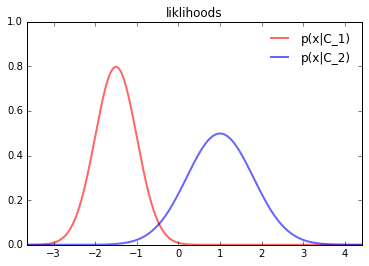

In [6]:
fig, ax = plt.subplots(1, 1)
plt.xlim([x_min,x_max])
plt.ylim([0,1])
plt.title('liklihoods')
plt.plot(x, liklihood_1, 
         'r' ,lw=2, alpha=0.6, label='p(x|C_1)')
plt.plot(x, liklihood_2, 
         'b', lw=2, alpha=0.6, label='p(x|C_2)')
ax.legend(loc='best', frameon=False)

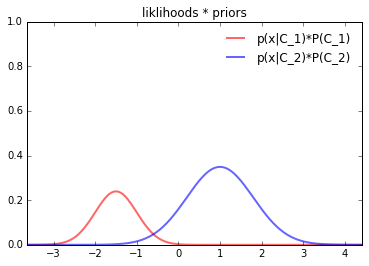

In [7]:
fig, ax = plt.subplots(1, 1)
plt.xlim([x_min,x_max])
plt.ylim([0,1])
plt.title('liklihoods * priors')
plt.plot(x, liklihood_1*prior_1, 
         'r' ,lw=2, alpha=0.6, label='p(x|C_1)*P(C_1)')
plt.plot(x, liklihood_2*prior_2, 
         'b', lw=2, alpha=0.6, label='p(x|C_2)*P(C_2)')
ax.legend(loc='best', frameon=False)

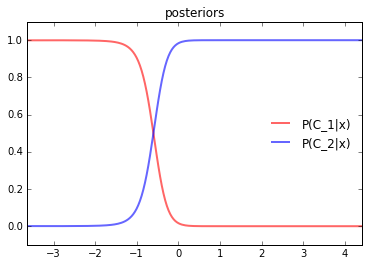

In [8]:
fig, ax = plt.subplots(1, 1)
plt.xlim([x_min,x_max])
plt.ylim([-0.1,1.1])
plt.title('posteriors')
plt.plot(x, (liklihood_1*prior_1)/evidence, 
         'r' ,lw=2, alpha=0.6, label='P(C_1|x)')
plt.plot(x, (liklihood_2*prior_2)/evidence, 
         'b', lw=2, alpha=0.6, label='P(C_2|x)')
ax.legend(loc='best', frameon=False)

## Scikit-learn (Perceptron Revisited)

In [9]:
%matplotlib inline
from mlclass import simplemetrics, plot_decision_2d

## Import Fisher's Iris Dataset

Here we download Fisher's Iris dataset and import it as a Pandas DataFrame.

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Clean and Plot the Data

We will only keep the classes 'setsosa' and 'versicolor'. 

We create a matrix of training samples:
\begin{equation}
\textbf{X} = \left\{ {{{\mathbf{x}}^t}} \right\}_{t = 1}^N
\end{equation}

In [11]:
# extract sepal length and petal length for samples 1:100 (Setsosa and Versicolor)
X = df.iloc[0:100, [0, 1]].values
X[0:5]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6]])



And a vector for the true classes.
\begin{equation}
\textbf{r} = \left\{ {{r^t}} \right\}_{t = 1}^N
\end{equation}

We put setsosa = 0 and virginica = 1.

In [12]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
y[0:5]

array([0, 0, 0, 0, 0])

Then we plot the data.

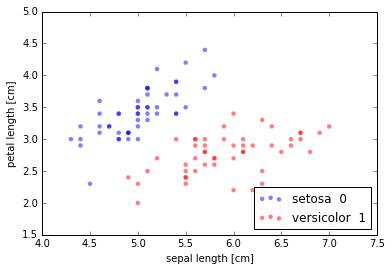

In [13]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],alpha=0.5, c='b', edgecolors='none', label='setosa %2s'%(y[0]))
plt.scatter(X[50:100, 0], X[50:100, 1],alpha=0.5, c='r', edgecolors='none', label='versicolor %2s'%(y[50]))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')

plt.show()

## ADALINE Model in 2D

Then we instantiate a new Perceptron object, setup its parameters, and fit this model.

\begin{equation}
g({\mathbf{x}}^t|\mathbf{w}) = \phi({{\mathbf{w}}^T}{{\mathbf{x}}^t})
\end{equation}

Our loss function is sum of squares.

\begin{equation}
E({\mathbf{w}}|{\mathbf{X}}) = \frac{1}{N}\sum\limits_{t = 1}^N {{{({r^t} - {y^t})}^2}}
\end{equation}

The fit method finds the best parameters by computing the gradient using sum of squares loss, then making an adjustment in the correct direction for T iterations.

\begin{equation}
{\mathbf{w} ^*} = \arg \mathop {\min }\limits_\mathbf{w}  E(\mathbf{w} |{\mathbf{X}})
\end{equation}

In [14]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,n_iter=1)
ppn.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=1, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

#### In 2D, we can see the decision regions.

We simply plot the model over a grid.

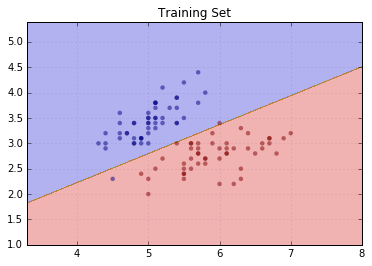

In [15]:
plot_decision_2d(ppn,X,y,title="Training Set")

Our model can now predict a new value for our classes.

In [16]:
predicted = ppn.predict(X)
predicted[0:5]

array([0, 0, 0, 0, 0])

Finally, we can use a function we provide to plot the confusion matrix and ROC curve. Note that in this case, setsosa is negative and versicolor is the positive.

Perceptron Error on Training Set


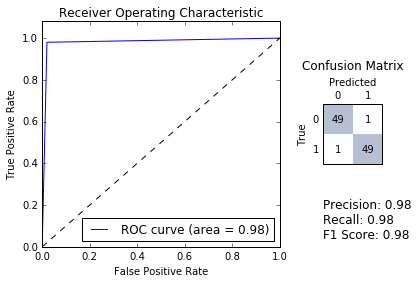

In [17]:
print "Perceptron Error on Training Set"
simplemetrics(y,predicted)

However, this is not a good model because we tested on the training set. We will see a better model below.

# Dataset Cleaning

In [18]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:
csv_data = unicode(csv_data)

# typically we read a CSV file like this
# df = pd.read_csv('example.csv')
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [19]:
print df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64


<b>Typically we drop missing values like this:</b>

In [20]:
# this is typically what you want to do:
# remove samples with missing values
df2 = df.dropna()
df2

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [21]:
# however, you might sometimes want to drop columns with
# missing values.
df3 = df.dropna(axis=1)
df3

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [22]:
# only drop rows where all columns are NaN
df4 = df.dropna(how='all')
df4

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [23]:
# drop rows that have not at least 4 non-NaN values
df5 = df.dropna(thresh=4)
df5

,A,B,C,D
0,1.0,2.0,3.0,4.0


## Imputing Missing Data

In [24]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

## Handling Categorical Data

In [25]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## Mapping Ordinal Features

In [26]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [27]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding Class Labels

In [28]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [29]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [30]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [31]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [32]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## Performing one-hot encoding on nominal features

In [33]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1L, 1L, 10.1],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [35]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


# Intro to Scikit-learn

Let's reimport the Iris Dataset.

In [36]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0, 1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

print "X:", X[0:5]
print "y:", y[0:5]

X: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]
y: [0 0 0 0 0]


## Train-Test Split

Split the Training and Testing sets.

In this case, we will use 60% for sample training and 40% for testing.

In [37]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=5)

print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)

Training set samples:  80
Testing set samples:  20


## Standard Scaler

Scales each column to have mean 0 and unit variance:
\begin{equation}
{{\mathbf{z}}_i} = \frac{{{{\mathbf{x}}_i} - {\mu _i}}}{{{\sigma _i}}}
\end{equation}

In [38]:
from sklearn import preprocessing
stdscaler = preprocessing.StandardScaler().fit(X_train)
print "Means of columns: ", stdscaler.mean_, "\nStandard deviation of columns:", stdscaler.scale_

X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

print "X unscaled: ", X[0:5]
print "X scaled:   ", X_scaled[0:5]

Means of columns:  [ 5.525   3.0775] 
Standard deviation of columns: [ 0.66247641  0.47195736]
X unscaled:  [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]
X scaled:    [[-0.64153227  0.89520799]
 [-0.94342981 -0.16420975]
 [-1.24532735  0.25955735]
 [-1.39627612  0.0476738 ]
 [-0.79248104  1.10709154]]


## Adaline Model in Scikit-learn with Split Data

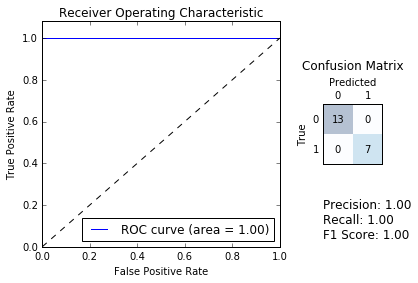

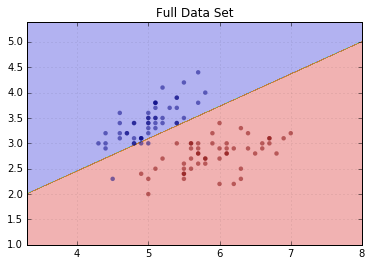

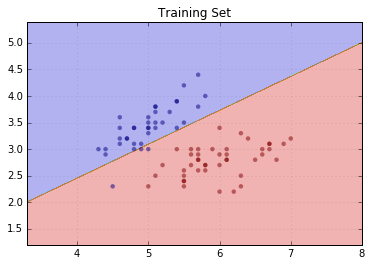

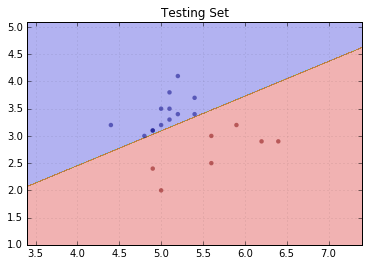

In [39]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01,n_iter=5)
ppn.fit(X_train, y_train)
predicted = ppn.predict(X_test)
simplemetrics(y_test,predicted)
plot_decision_2d(ppn,X,y,title="Full Data Set")
plot_decision_2d(ppn,X_train,y_train,title="Training Set")
plot_decision_2d(ppn,X_test,y_test,title="Testing Set")

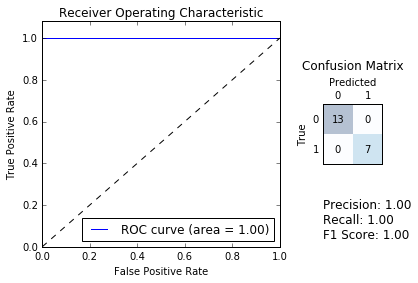

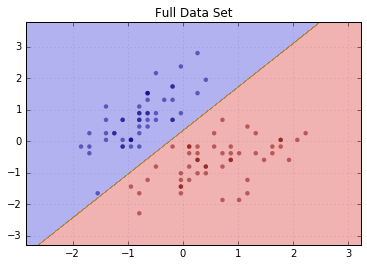

In [40]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01,n_iter=5)
ppn.fit(X_train_scaled, y_train)
predicted = ppn.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d(ppn,X_scaled,y,title="Full Data Set")

## Gaussian Naive Bayes Model

In this section of the notebook, implement Gaussian Naive Bayes using the documentation found here:<br>
http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

Modify the cell below to use Gaussian Naive Bayes instead of a Perceptron. Make sure it is displaying the results for a Gaussian Naive Bayes model, including plotting the decision region. The results should look sililar to the image below:

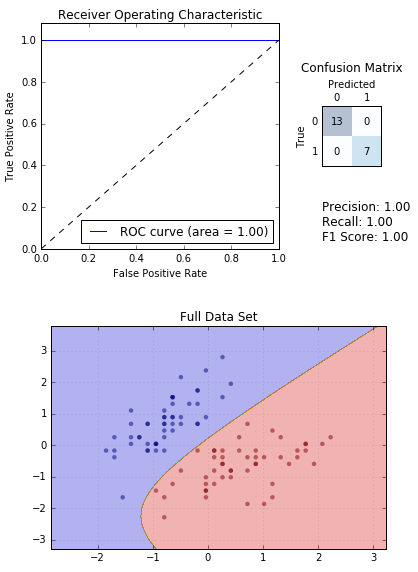

In [41]:
from IPython.display import Image
Image('week2result.png')

## <span style="color:red">Implement Your Code Here:</span>

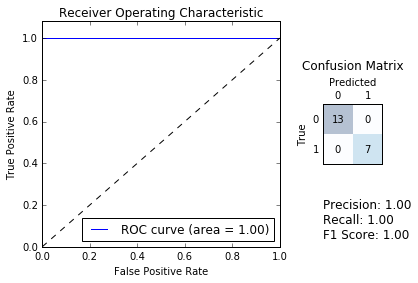

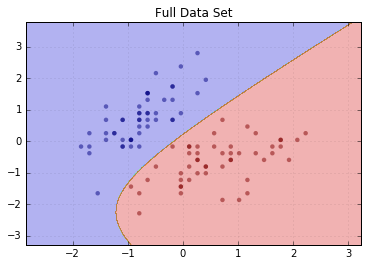

In [42]:
# You don't need to modify this code.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import preprocessing
from mlclass import simplemetrics, plot_decision_2d

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0, 1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=5)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# **** modify the code below to run a gnb model ****
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predicted = gnb.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d(gnb,X_scaled,y,title="Full Data Set")

## <span style="color:red">Install TextBlob into your Python distribution</span>

Type the following into the command line (Command Line on Windows, Terminal on Mac/Linux) to install TextBlob (a natural language toolkit for Python):

`pip install -U textblob`<br>
`python -m textblob.download_corpora`

After textblob is installed, run the following code. It should output the following:<br>
`Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
Sentiment(polarity=-0.4, subjectivity=0.825)`

In [43]:
from textblob import TextBlob

testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print testimonial.sentiment

testimonial = TextBlob("Textblob is annoying. What total junk.")
print testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
Sentiment(polarity=-0.4, subjectivity=0.825)


We will use TextBlob next week to build a spam filter.